In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [100]:
def empty_cells(y,item):
    x = y.flatten()
    locs = []
    for i in range(x.shape[0]):
        if x[i] == 0 and item == 'box':
            locs.append(i)
        elif x[i] == 1 and item == 'ball':
            locs.append(i)
        else:
            pass
        
    return locs



def select_box(i,k,database,crowd): # k>day,i>ball number
    
    # occupancy_fraction = 1/(crowd[k,j])
    if k == 0:
        j = np.random.randint(0,N)
    else:
        last_location = database[i][k-1]
        yesterday_crowd = crowd[k-1,last_location]
        if yesterday_crowd == 0:
            j = last_location #np.random.randint(0,N)
        elif yesterday_crowd != 0:
            if np.random.random() < 1/(yesterday_crowd + 1):    #occupancy_fraction:
                j = last_location # last day's box
            else:
                j = np.random.randint(0,N) # new box
    return j

In [101]:
# N = 12
# steps = 150
# balls = np.ones((steps,N))
# boxes = np.zeros((steps,N))
# crowd = np.zeros((steps,N))
# utils, database = [], {}
ball_count = []
utility_tracker = []
U = []

###### i = ball number, j = box number ,k = step number

for a in range(5,51):
    N = 1*a
    steps = 50000
    balls = np.ones((steps,N))
    boxes = np.zeros((steps,N))
    crowd = np.zeros((steps,N))
    utils, database = [], {}

    # while utility < 99:
    for k in range(steps):

        while balls[k].sum() > 0:
            # print('\n\n','*'*20,'Execution no:',k,'*'*20)

            balls_left = empty_cells(balls[k],'ball')
            i = np.random.choice(balls_left) # randomly selecting ball

            if balls[k,i] == 1:


                j = select_box(i,k,database,crowd) 
                # j = np.random.randint(0,N)   # selecting a box randmly 
                                             # Additional criteria can be applied here

                if boxes[k,j] == 0.0:
                    boxes[k,j] = boxes[k,j] + 1
                    # print('{}-th ball went to {}-th box and {} balls left'.format(i+1,j+1,int(balls[k].sum()-1)))

                    ## store the i,j value in a variable
                    if database.get(i) is None:
                        database[i] = [j]

                    else:
                        database[i] = database[i] + [j] 

                else:
                    # print('{}-th ball got wasted and {} balls left'.format(i+1,int(balls[k].sum()-1)))
                    crowd[k,j] = crowd[k,j] + 1


                     ## store the i,j value in a variable
                    if database.get(i) is None:
                        database[i] = [j]
                    else:
                        database[i] = database[i] + [j]


                balls[k,i] = balls[k,i] - 1
            else:
                print('CAUTION!! No ball is thrown')

    #         if N < 25:
    #             print("")
    #             print('Balls config:',balls[k])
    #             print('Boxes config:',boxes[k])
    #             print("Crowd  Track:",crowd[k])
    #         else:
    #             pass

        utility = boxes[k].sum()*100/N
        utils.append(utility)
        if utility >= 100:
            ball_count.append(N)
            utility_tracker.append(k)
            break
        
        else:
            pass
        # break
            
        # print('\n\nThe final utility is of {}-th run is: {} %'.format(k,utility))
    U.append(utils)
    # break

KeyboardInterrupt: 

In [ ]:
# U

In [102]:
ball_count[-1]

45

In [105]:
utility_tracker

131882

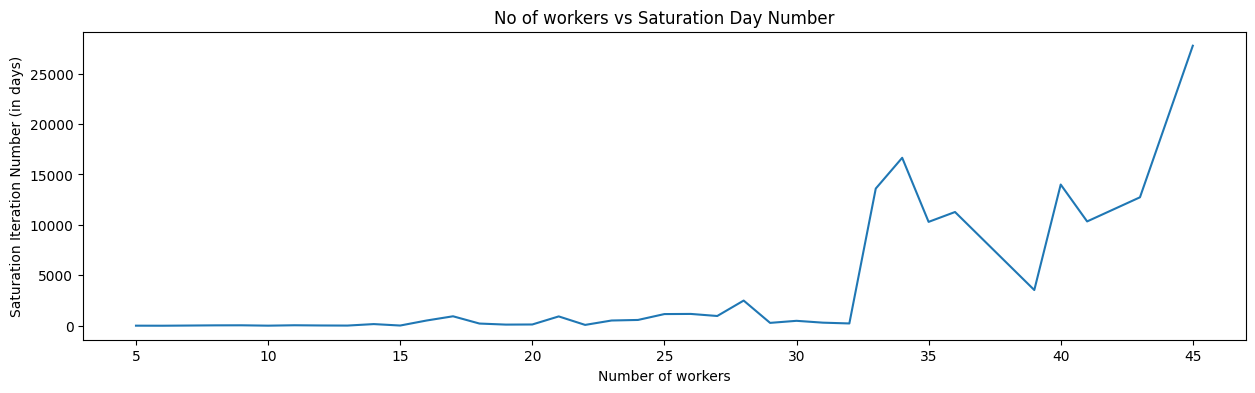

In [109]:
# print("The average occupancy or utility is {}% for {} balls".format(np.array(utils).mean(),N))
plt.figure(figsize=(15,4))
plt.plot(ball_count,utility_tracker)
plt.xlabel("Number of workers")
plt.ylabel("Saturation Iteration Number (in days)")
plt.title("No of workers vs Saturation Day Number")
# plt.axhline(y = np.array(utils).mean(), color = 'r', linestyle = '-')
plt.show()